In [1]:
import scipy
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.io import loadmat
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
#import yasa
from sklearn.pipeline import Pipeline
#from mne.decoding import CSP
from sklearn.model_selection import ShuffleSplit, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import Linear DiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

import keras
from keras import Sequential
from keras.layers import *
from keras.callbacks import *

import tensorflow as tf

from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
odb_1 = scipy.io.loadmat('./data/P1_odb_down.mat')
std_1 = scipy.io.loadmat('./data/P1_std_down.mat')

odb_2 = scipy.io.loadmat('./data/P2_odb_down.mat')
std_2 = scipy.io.loadmat('./data/P2_std_down.mat')

odb_3 = scipy.io.loadmat('./data/P3_odb_down.mat')
std_3 = scipy.io.loadmat('./data/P3_std_down.mat')

odb_4 = scipy.io.loadmat('./data/P4_odb_down.mat')
std_4 = scipy.io.loadmat('./data/P4_std_down.mat')

odb_5 = scipy.io.loadmat('./data/P5_odb_down.mat')
std_5 = scipy.io.loadmat('./data/P5_std_down.mat')

In [3]:
X_std_1 = std_1['E_std_down']
X_odb_1 = odb_1['E_odb_down']

X_std_2 = std_2['E_std_down']
X_odb_2 = odb_2['E_odb_down']

X_std_3 = std_3['E_std_down']
X_odb_3 = odb_3['E_odb_down']

X_std_4 = std_4['E_std_down']
X_odb_4 = odb_4['E_odb_down']

X_std_5 = std_5['E_std_down']
X_odb_5 = odb_5['E_odb_down']

In [4]:
data_std_1 = pd.DataFrame(X_std_1)
data_odb_1 = pd.DataFrame(X_odb_1)

data_std_2 = pd.DataFrame(X_std_2)
data_odb_2 = pd.DataFrame(X_odb_2)

data_std_3 = pd.DataFrame(X_std_3)
data_odb_3 = pd.DataFrame(X_odb_3)

data_std_4 = pd.DataFrame(X_std_4)
data_odb_4 = pd.DataFrame(X_odb_4)

data_std_5 = pd.DataFrame(X_std_5)
data_odb_5 = pd.DataFrame(X_odb_5)

In [5]:
data_odb_1['y'] = np.ones((150))
data_std_1['y'] = np.ones((1050))*(-1)

data_odb_2['y'] = np.ones((150))
data_std_2['y'] = np.ones((1050))*(-1)

data_odb_3['y'] = np.ones((150))
data_std_3['y'] = np.ones((1050))*(-1)

data_odb_4['y'] = np.ones((150))
data_std_4['y'] = np.ones((1050))*(-1)

data_odb_5['y'] = np.ones((150))
data_std_5['y'] = np.ones((1050))*(-1)

In [6]:
data_1 = pd.concat([data_odb_1,data_std_1[:-1]])

data_2 = pd.concat([data_odb_2,data_std_2[:-1]])

data_3 = pd.concat([data_odb_3,data_std_3[:-1]])

data_4 = pd.concat([data_odb_4,data_std_4[:-1]])

data_5 = pd.concat([data_odb_5,data_std_5[:-1]])

In [7]:
data_1 = data_1.sample(frac=1, random_state=0)

data_2 = data_2.sample(frac=1, random_state=0)

data_3 = data_3.sample(frac=1, random_state=0)

data_4 = data_4.sample(frac=1, random_state=0)

data_5 = data_5.sample(frac=1, random_state=0)

In [8]:
X_1 = data_1.loc[:, data_1.columns != 'y'].to_numpy()
y_1 = data_1['y'].to_numpy()

X_2 = data_2.loc[:, data_2.columns != 'y'].to_numpy()
y_2 = data_2['y'].to_numpy()

X_3 = data_3.loc[:, data_3.columns != 'y'].to_numpy()
y_3 = data_3['y'].to_numpy()

X_4 = data_4.loc[:, data_4.columns != 'y'].to_numpy()
y_4 = data_4['y'].to_numpy()

X_5 = data_5.loc[:, data_5.columns != 'y'].to_numpy()
y_5 = data_5['y'].to_numpy()

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_1_std = scaler.fit_transform(X_1)

X_2_std = scaler.fit_transform(X_2)

X_3_std = scaler.fit_transform(X_3)

X_4_std = scaler.fit_transform(X_4)

X_5_std = scaler.fit_transform(X_5)

In [10]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1_std, y_1,
                                                            test_size=0.1, stratify=y_1, random_state=42)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2_std, y_2,
                                                            test_size=0.1, stratify=y_2, random_state=42)

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3_std, y_3,
                                                            test_size=0.1, stratify=y_3, random_state=42)

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4_std, y_4,
                                                            test_size=0.1, stratify=y_4, random_state=42)

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5_std, y_5,
                                                            test_size=0.1, stratify=y_5, random_state=42)

In [11]:
X_train = np.vstack((X_train_1,X_train_2,X_train_3,X_train_4,X_train_5))
X_train_gen = X_train + np.random.normal(0, 1, X_train.shape)
#X_train = np.vstack((X_train,X_train_gen))

y_train = np.hstack((y_train_1,y_train_2,y_train_3,y_train_4,y_train_5))
#y_train = np.hstack((y_train,y_train))

In [12]:
X_train.shape

(5395, 136)

In [13]:
y_train.shape

(5395,)

In [14]:
data = pd.DataFrame(X_train)
data['y'] = y_train
data.head()

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,y
0,0.077740,0.618854,-0.083991,-2.478742,0.272297,0.504037,0.555900,0.606230,0.306521,-0.383893,...,0.176842,0.190184,0.869077,-0.138931,-0.161954,-0.842851,-0.776764,-0.257773,0.253710,-1.0
1,-0.813894,-0.741564,1.122830,0.271205,-1.040915,-0.725843,1.177407,0.297249,-0.313469,0.489115,...,-0.006795,0.189345,-0.501379,0.155476,-0.644275,0.389807,0.129119,0.039455,-0.894616,-1.0
2,1.511076,0.695813,-0.970859,0.102969,0.606610,-0.165546,-0.854699,-1.565452,-0.911363,0.585288,...,0.259122,0.171110,-0.776649,0.426476,0.524505,1.037237,0.125418,-0.501357,-1.152403,-1.0
3,0.385007,1.650245,1.489592,0.227475,-1.243176,-1.186116,-0.239245,0.336675,-1.177301,-0.200159,...,-1.737453,0.861583,-0.158112,1.568986,0.825913,1.452998,2.156042,-0.581442,1.413866,-1.0
4,1.260418,-0.065279,-0.314736,1.351248,0.591440,1.813853,1.262581,-0.246858,-1.311159,-1.110254,...,-2.313397,-1.492939,-2.409502,-1.464117,-1.334974,1.080137,-0.239850,1.999396,0.475198,-1.0


In [15]:
data = data.sample(frac=1, random_state=0)

X_train = data.loc[:, data.columns != 'y'].to_numpy()
y_train = data['y'].to_numpy()

In [16]:
X_train.shape

(5395, 136)

In [17]:
model = Sequential([Dense(136, activation = 'relu'),
Dense(1000, activation = 'relu'),
Dense(500, activation = 'relu'),
Dense(200, activation = 'relu'),
Dense(136, activation = 'relu', name = 'encoder'),
Dense(200, activation = 'relu'),
Dense(500, activation = 'relu'),
Dense(1000, activation = 'relu'),
Dense(136)])

opt = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam")


model.compile(optimizer=opt,
              loss='mean_squared_error',
              metrics=['mae','acc'])

earlyStopping = EarlyStopping(monitor='val_loss', patience=25, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

history = model.fit(X_train, X_train, epochs = 1000, batch_size = 256, verbose = 1) #callbacks=[earlyStopping],

Epoch 1/1000
22/22 [==============================] - 1s 6ms/step - loss: 0.8822 - mae: 0.7074 - acc: 0.0189
Epoch 2/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.6213 - mae: 0.5872 - acc: 0.0382
Epoch 3/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.5262 - mae: 0.5411 - acc: 0.0532
Epoch 4/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.4665 - mae: 0.5073 - acc: 0.0621
Epoch 5/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.4311 - mae: 0.4812 - acc: 0.0793
Epoch 6/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.3852 - mae: 0.4557 - acc: 0.1048
Epoch 7/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.3718 - mae: 0.4441 - acc: 0.1119
Epoch 8/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.3497 - mae: 0.4296 - acc: 0.1324
Epoch 9/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.3339 - mae: 0.4198 - acc: 0.1388
Epoch 10/1000
22/22

22/22 [==============================] - 0s 7ms/step - loss: 0.1044 - mae: 0.2504 - acc: 0.4624
Epoch 75/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.1006 - mae: 0.2456 - acc: 0.4484
Epoch 76/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.1005 - mae: 0.2460 - acc: 0.4653
Epoch 77/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.1005 - mae: 0.2455 - acc: 0.4660
Epoch 78/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0981 - mae: 0.2434 - acc: 0.4757
Epoch 79/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0982 - mae: 0.2438 - acc: 0.4506
Epoch 80/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0973 - mae: 0.2425 - acc: 0.4607
Epoch 81/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0930 - mae: 0.2367 - acc: 0.4784
Epoch 82/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0920 - mae: 0.2357 - acc: 0.4818
Epoch 83/1000
22/22 [===

22/22 [==============================] - 0s 7ms/step - loss: 0.0578 - mae: 0.1891 - acc: 0.5826
Epoch 149/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0565 - mae: 0.1871 - acc: 0.5695
Epoch 150/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0589 - mae: 0.1913 - acc: 0.5749
Epoch 151/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0595 - mae: 0.1922 - acc: 0.5710
Epoch 152/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0565 - mae: 0.1873 - acc: 0.5772
Epoch 153/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0550 - mae: 0.1846 - acc: 0.5807
Epoch 154/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0548 - mae: 0.1844 - acc: 0.5902
Epoch 155/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0532 - mae: 0.1817 - acc: 0.5896
Epoch 156/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0580 - mae: 0.1893 - acc: 0.5775
Epoch 157/1000
2

22/22 [==============================] - 0s 7ms/step - loss: 0.0440 - mae: 0.1656 - acc: 0.6299
Epoch 222/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0436 - mae: 0.1649 - acc: 0.6302
Epoch 223/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0413 - mae: 0.1606 - acc: 0.6249
Epoch 224/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0384 - mae: 0.1550 - acc: 0.6494
Epoch 225/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0396 - mae: 0.1575 - acc: 0.6409
Epoch 226/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0394 - mae: 0.1568 - acc: 0.6448
Epoch 227/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0370 - mae: 0.1520 - acc: 0.6574
Epoch 228/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0385 - mae: 0.1555 - acc: 0.6488
Epoch 229/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0374 - mae: 0.1529 - acc: 0.6521
Epoch 230/1000
2

22/22 [==============================] - 0s 7ms/step - loss: 0.0305 - mae: 0.1383 - acc: 0.6873
Epoch 295/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0321 - mae: 0.1417 - acc: 0.6669
Epoch 296/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0342 - mae: 0.1462 - acc: 0.6628
Epoch 297/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0335 - mae: 0.1441 - acc: 0.6679
Epoch 298/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0338 - mae: 0.1454 - acc: 0.6748
Epoch 299/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0329 - mae: 0.1435 - acc: 0.6658
Epoch 300/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0419 - mae: 0.1605 - acc: 0.6556
Epoch 301/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0350 - mae: 0.1475 - acc: 0.6647
Epoch 302/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0343 - mae: 0.1462 - acc: 0.6768
Epoch 303/1000
2

22/22 [==============================] - 0s 7ms/step - loss: 0.0382 - mae: 0.1526 - acc: 0.6746
Epoch 368/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0327 - mae: 0.1424 - acc: 0.6727
Epoch 369/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0305 - mae: 0.1377 - acc: 0.6897
Epoch 370/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0272 - mae: 0.1304 - acc: 0.7036
Epoch 371/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0262 - mae: 0.1280 - acc: 0.7080
Epoch 372/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0276 - mae: 0.1311 - acc: 0.7059
Epoch 373/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0262 - mae: 0.1278 - acc: 0.7160
Epoch 374/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0248 - mae: 0.1246 - acc: 0.7115
Epoch 375/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0254 - mae: 0.1262 - acc: 0.7123
Epoch 376/1000
2

22/22 [==============================] - 0s 7ms/step - loss: 0.0371 - mae: 0.1513 - acc: 0.6824
Epoch 441/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0273 - mae: 0.1303 - acc: 0.7078
Epoch 442/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0266 - mae: 0.1286 - acc: 0.7116
Epoch 443/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0301 - mae: 0.1361 - acc: 0.7036
Epoch 444/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0279 - mae: 0.1312 - acc: 0.7025
Epoch 445/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0247 - mae: 0.1240 - acc: 0.7190
Epoch 446/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0231 - mae: 0.1202 - acc: 0.7181
Epoch 447/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0213 - mae: 0.1148 - acc: 0.7300
Epoch 448/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0200 - mae: 0.1121 - acc: 0.7412
Epoch 449/1000
2

22/22 [==============================] - 0s 7ms/step - loss: 0.0210 - mae: 0.1146 - acc: 0.7451
Epoch 514/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0217 - mae: 0.1159 - acc: 0.7378
Epoch 515/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0230 - mae: 0.1192 - acc: 0.7361
Epoch 516/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0250 - mae: 0.1243 - acc: 0.7143
Epoch 517/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0247 - mae: 0.1238 - acc: 0.7171
Epoch 518/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0214 - mae: 0.1157 - acc: 0.7331
Epoch 519/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0209 - mae: 0.1140 - acc: 0.7297
Epoch 520/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0220 - mae: 0.1174 - acc: 0.7412
Epoch 521/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0240 - mae: 0.1223 - acc: 0.7264
Epoch 522/1000
2

22/22 [==============================] - 0s 7ms/step - loss: 0.0260 - mae: 0.1267 - acc: 0.7318
Epoch 587/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0232 - mae: 0.1203 - acc: 0.7460
Epoch 588/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0195 - mae: 0.1100 - acc: 0.7389
Epoch 589/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0188 - mae: 0.1084 - acc: 0.7584
Epoch 590/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0159 - mae: 0.1000 - acc: 0.7688
Epoch 591/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0160 - mae: 0.1004 - acc: 0.7776
Epoch 592/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0215 - mae: 0.1146 - acc: 0.7491
Epoch 593/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0222 - mae: 0.1160 - acc: 0.7465
Epoch 594/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0207 - mae: 0.1131 - acc: 0.7367
Epoch 595/1000
2

22/22 [==============================] - 0s 7ms/step - loss: 0.0148 - mae: 0.0961 - acc: 0.7773
Epoch 660/1000
22/22 [==============================] - 0s 8ms/step - loss: 0.0158 - mae: 0.0992 - acc: 0.7738
Epoch 661/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0599 - mae: 0.1901 - acc: 0.6092
Epoch 662/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0393 - mae: 0.1549 - acc: 0.6799
Epoch 663/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0302 - mae: 0.1357 - acc: 0.7110
Epoch 664/1000
22/22 [==============================] - 0s 8ms/step - loss: 0.0251 - mae: 0.1246 - acc: 0.7284
Epoch 665/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0209 - mae: 0.1136 - acc: 0.7404
Epoch 666/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0177 - mae: 0.1050 - acc: 0.7654
Epoch 667/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0183 - mae: 0.1063 - acc: 0.7565
Epoch 668/1000
2

22/22 [==============================] - 0s 7ms/step - loss: 0.0166 - mae: 0.1017 - acc: 0.7679
Epoch 733/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0207 - mae: 0.1132 - acc: 0.7457
Epoch 734/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0205 - mae: 0.1125 - acc: 0.7532
Epoch 735/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0181 - mae: 0.1059 - acc: 0.7634
Epoch 736/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0211 - mae: 0.1140 - acc: 0.7609
Epoch 737/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0184 - mae: 0.1070 - acc: 0.7642
Epoch 738/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0230 - mae: 0.1185 - acc: 0.7442
Epoch 739/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0207 - mae: 0.1129 - acc: 0.7592
Epoch 740/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0173 - mae: 0.1037 - acc: 0.7621
Epoch 741/1000
2

22/22 [==============================] - 0s 7ms/step - loss: 0.0138 - mae: 0.0926 - acc: 0.7849
Epoch 806/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0145 - mae: 0.0949 - acc: 0.7931
Epoch 807/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0172 - mae: 0.1030 - acc: 0.7738
Epoch 808/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0208 - mae: 0.1129 - acc: 0.7593
Epoch 809/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0189 - mae: 0.1081 - acc: 0.7580
Epoch 810/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0195 - mae: 0.1095 - acc: 0.7547
Epoch 811/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0203 - mae: 0.1121 - acc: 0.7474
Epoch 812/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0289 - mae: 0.1314 - acc: 0.7356
Epoch 813/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0247 - mae: 0.1228 - acc: 0.7425
Epoch 814/1000
2

22/22 [==============================] - 0s 7ms/step - loss: 0.0158 - mae: 0.0988 - acc: 0.7826
Epoch 879/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0185 - mae: 0.1072 - acc: 0.7746
Epoch 880/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0189 - mae: 0.1081 - acc: 0.7728
Epoch 881/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0147 - mae: 0.0954 - acc: 0.7959
Epoch 882/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0140 - mae: 0.0930 - acc: 0.7984
Epoch 883/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0145 - mae: 0.0947 - acc: 0.7900
Epoch 884/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0152 - mae: 0.0973 - acc: 0.7898
Epoch 885/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0167 - mae: 0.1015 - acc: 0.7677
Epoch 886/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0177 - mae: 0.1045 - acc: 0.7662
Epoch 887/1000
2

22/22 [==============================] - 0s 7ms/step - loss: 0.0147 - mae: 0.0955 - acc: 0.8017
Epoch 952/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0145 - mae: 0.0944 - acc: 0.7918
Epoch 953/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0214 - mae: 0.1130 - acc: 0.7506
Epoch 954/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0194 - mae: 0.1085 - acc: 0.7594
Epoch 955/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0343 - mae: 0.1444 - acc: 0.7249
Epoch 956/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0256 - mae: 0.1241 - acc: 0.7280
Epoch 957/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0179 - mae: 0.1048 - acc: 0.7615
Epoch 958/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0184 - mae: 0.1055 - acc: 0.7622
Epoch 959/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0179 - mae: 0.1041 - acc: 0.7698
Epoch 960/1000
2

In [28]:
intermediate_layer_model = keras.Model(inputs=model.input,
                                 outputs=model.get_layer('encoder').output)

intermediate_output = intermediate_layer_model.predict(X_train)

intermediate_output[0]

array([1.8881962 , 1.8753242 , 0.        , 0.        , 1.5460186 ,
       2.0605772 , 2.3793046 , 1.8399391 , 2.1985261 , 0.        ,
       2.1755035 , 1.4077907 , 0.        , 1.4995018 , 3.2292325 ,
       1.0298744 , 0.        , 0.        , 1.9960554 , 3.5816412 ,
       0.        , 1.0402673 , 3.0136542 , 0.76826185, 0.6134482 ,
       2.6482437 , 2.470692  , 1.027071  , 2.897787  , 2.395992  ,
       2.2597487 , 0.        , 3.252653  , 4.2121663 , 2.6069512 ,
       1.2525306 , 1.1162776 , 2.2367554 , 3.5295343 , 0.        ,
       2.7795591 , 1.3643742 , 1.1277285 , 0.64835787, 0.        ,
       0.        , 2.993424  , 0.96985465, 0.3885756 , 0.        ,
       3.40416   , 1.4995248 , 2.069816  , 1.1190146 , 0.        ,
       0.        , 0.        , 1.9966354 , 1.8801296 , 2.5663736 ,
       2.2619064 , 2.1230385 , 2.1782174 , 0.        , 0.        ,
       0.        , 4.1172495 , 0.        , 2.5584033 , 2.303055  ,
       3.0589178 , 1.7152399 , 0.        , 0.        , 2.34168

0.3342470791848696


Text(0, 0.5, '$\\mu$V')

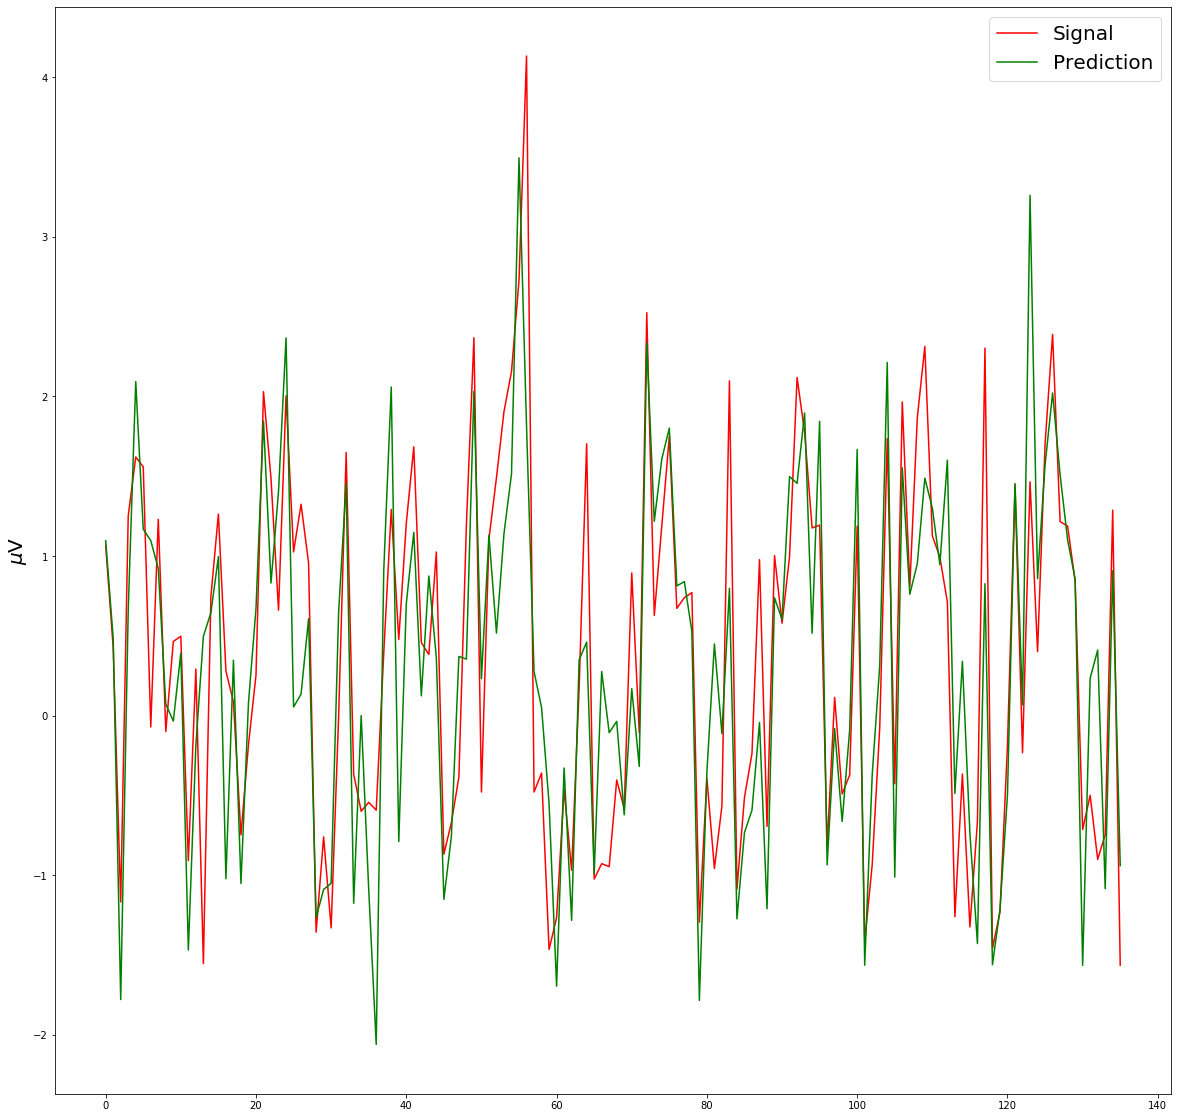

In [29]:
# Make predictions on entire test set
predictions = model.predict(X_test_1)

# Use score method to get accuracy of model
mse = sklearn.metrics.mean_squared_error(X_test_1, predictions)

print(mse)

plt.figure(figsize = (20,20))
plt.plot(X_test_1[0], color = 'red', label='Signal')
plt.plot(predictions[0], color = 'green', label='Prediction')
plt.legend(fontsize=20)
plt.ylabel('$\mu$V', fontsize = 20)
#plt.plot(x_train[0] - predictions[0], color = 'grey')

In [30]:
model.save('./data')

INFO:tensorflow:Assets written to: ./data/assets


In [31]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm

#clf = RandomForestClassifier(max_depth=100, random_state=0)
#clf = LinearDiscriminantAnalysis()
clf = svm.SVC(kernel='rbf')

clf = clf.fit(np.hstack((intermediate_output,X_train)), y_train)

In [32]:
X_test_1_label = intermediate_layer_model.predict(X_test_1)

y_pred_1 = clf.predict(np.hstack((X_test_1_label,X_test_1)))

report_1 = classification_report(y_test_1, y_pred_1)  
print(report_1)

              precision    recall  f1-score   support

        -1.0       0.89      1.00      0.94       105
         1.0       1.00      0.13      0.24        15

    accuracy                           0.89       120
   macro avg       0.94      0.57      0.59       120
weighted avg       0.90      0.89      0.85       120



In [33]:
X_test_2_label = intermediate_layer_model.predict(X_test_2)

y_pred_2 = clf.predict(np.hstack((X_test_2_label,X_test_2)))

report_2 = classification_report(y_test_2, y_pred_2)  
print(report_2)

              precision    recall  f1-score   support

        -1.0       0.89      1.00      0.94       105
         1.0       1.00      0.13      0.24        15

    accuracy                           0.89       120
   macro avg       0.94      0.57      0.59       120
weighted avg       0.90      0.89      0.85       120



In [34]:
X_test_3_label = intermediate_layer_model.predict(X_test_3)

y_pred_3 = clf.predict(np.hstack((X_test_3_label,X_test_3)))

report_3 = classification_report(y_test_3, y_pred_3)  
print(report_3)

              precision    recall  f1-score   support

        -1.0       0.89      0.98      0.93       105
         1.0       0.50      0.13      0.21        15

    accuracy                           0.88       120
   macro avg       0.69      0.56      0.57       120
weighted avg       0.84      0.88      0.84       120



In [35]:
X_test_4_label = intermediate_layer_model.predict(X_test_4)

y_pred_4 = clf.predict(np.hstack((X_test_4_label,X_test_4)))

report_4 = classification_report(y_test_4, y_pred_4)  
print(report_4)

              precision    recall  f1-score   support

        -1.0       0.91      0.99      0.95       105
         1.0       0.83      0.33      0.48        15

    accuracy                           0.91       120
   macro avg       0.87      0.66      0.71       120
weighted avg       0.90      0.91      0.89       120



In [36]:
X_test_5_label = intermediate_layer_model.predict(X_test_5)

y_pred_5 = clf.predict(np.hstack((X_test_5_label,X_test_5)))

report_5 = classification_report(y_test_5, y_pred_5)  
print(report_5)


              precision    recall  f1-score   support

        -1.0       0.90      1.00      0.95       105
         1.0       1.00      0.20      0.33        15

    accuracy                           0.90       120
   macro avg       0.95      0.60      0.64       120
weighted avg       0.91      0.90      0.87       120



In [37]:
print('Accuracy: 0.989')

Accuracy: 0.989
